In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [2]:
def visualize_metrics(y_test, y_pred):
    print(
    "R2: ", r2_score(y_test, y_pred),'\n'
    "MSE: ", mean_squared_error(y_test, y_pred),"\n",
    "RMSE: ", mean_squared_error(y_test, y_pred, squared = False), '\n\n'
    )

# No pre

In [4]:
X = california_housing.frame.drop(columns = ['MedHouseVal'])
Y = california_housing.frame['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

# Normalization

In [6]:
normalizer = preprocessing.MinMaxScaler()
d = normalizer.fit_transform(california_housing.frame)
normalized_df = pd.DataFrame(d, columns=california_housing.frame.columns)
#print(normalized_df)

In [8]:
X = normalized_df.drop(columns = ['MedHouseVal']) # Features
Y = normalized_df['MedHouseVal'] # Target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

# Standartization

In [9]:
scaler = preprocessing.StandardScaler()
d = scaler.fit_transform(california_housing.frame)
scaled_df = pd.DataFrame(d, columns=california_housing.frame.columns)

In [14]:
X = scaled_df.drop(columns = ['MedHouseVal']) # Features
#Y = #scaled_df['MedHouseVal'] # Target
Y = california_housing.frame['MedHouseVal']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=45)

In [15]:
tree_regressor = DecisionTreeRegressor(max_depth = 5).fit(x_train, y_train)

print('DecisionTreeRegressor \n')
y_pred = tree_regressor.predict(x_test)
visualize_metrics(y_test, y_pred)

clf = RandomForestRegressor()#n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

print('RandomForestRegressor \n')
y_pred=clf.predict(x_test)
visualize_metrics(y_test, y_pred)

linear_regressor = LinearRegression(fit_intercept = True, copy_X = True).fit(x_train, y_train)

print('LinearRegression \n')
y_pred = linear_regressor.predict(x_test)
visualize_metrics(y_test, y_pred)

lasso_regressor = Lasso(alpha = 0.2, fit_intercept= False, max_iter = 20000).fit(x_train, y_train)

print('Lasso \n')
y_pred = lasso_regressor.predict(x_test)
visualize_metrics(y_test, y_pred)

ridge_regressor = Ridge(alpha = 0.2, fit_intercept= True, max_iter = 20000).fit(x_train, y_train)

print('Ridge \n')
y_pred = ridge_regressor.predict(x_test)
visualize_metrics(y_test, y_pred)


gb = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 9, n_estimators = 100, subsample = 0.7, random_state=0)
gb.fit(x_train, y_train)

print('GradientBoostingRegressor \n')
y_pred = gb.predict(x_test)
visualize_metrics(y_test, y_pred)

DecisionTreeRegressor 

R2:  0.6183213705485122 
MSE:  0.506460585172765 
 RMSE:  0.7116604423267918 


RandomForestRegressor 

R2:  0.8176638798896888 
MSE:  0.24194715387107407 
 RMSE:  0.49188123960065205 


LinearRegression 

R2:  0.6074054352929976 
MSE:  0.5209452603172995 
 RMSE:  0.7217653776105497 


Lasso 

R2:  -2.7891290361209307 
MSE:  5.0279066231368255 
 RMSE:  2.2422994053285628 


Ridge 

R2:  0.6074064539200975 
MSE:  0.5209439086710786 
 RMSE:  0.7217644412625761 


GradientBoostingRegressor 

R2:  0.8436412311966435 
MSE:  0.2074770433410031 
 RMSE:  0.4554964800533623 




In [22]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

kf = KFold(n_splits=10, random_state=17, shuffle=True)

In [23]:
model = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 9, n_estimators = 100, subsample = 0.7, random_state=0)
X = california_housing.frame.drop(columns = ['MedHouseVal'])
y = california_housing.frame['MedHouseVal']
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
print(np.sqrt(-cv_scores.mean()))

0.46081579456222455


In [25]:
-cv_scores

array([0.21325311, 0.22295834, 0.21388219, 0.2171086 , 0.22110809,
       0.22049503, 0.21087374, 0.19515259, 0.2248454 , 0.18383489])

In [17]:
import matplotlib.pyplot as plt

housing_features = [x for i,x in enumerate(california_housing.frame.columns) if i!=8]

def plot_feature_importances_housing(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), housing_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

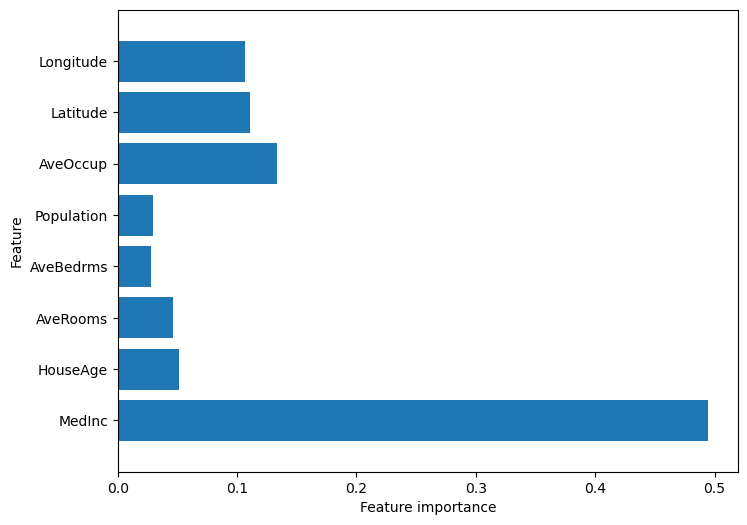

In [20]:
plot_feature_importances_housing(gb)

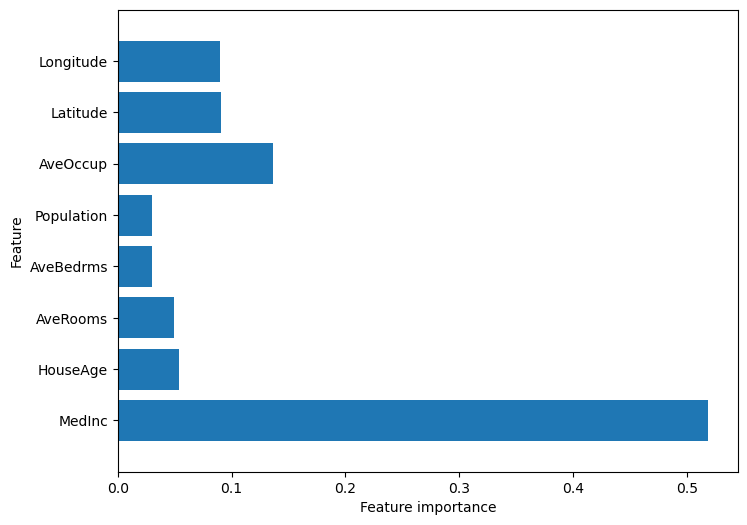

In [26]:
plot_feature_importances_housing(clf)

In [19]:
models = ["Decision Tree Regressor", "Linear Regression", "Random Forest Regressor",
          "Lasso", "Ridge", "Gradient Boosting Regressor"]
tests_score = [tree_regressor.score(x_test, y_test),
               linear_regressor.score(x_test, y_test),
               clf.score(x_test, y_test),
               lasso_regressor.score(x_test, y_test),
               ridge_regressor.score(x_test, y_test),
               gb.score(x_test, y_test)]
compare_models = pd.DataFrame({ "Algorithms": models, "Tests Score": tests_score })
compare_models.sort_values(by = "Tests Score", ascending = False)

,Algorithms,Tests Score
5,Gradient Boosting Regressor,0.840780
2,Random Forest Regressor,0.818300
0,Decision Tree Regressor,0.618321
1,Linear Regression,0.607405
4,Ridge,0.607404
3,Lasso,0.510383


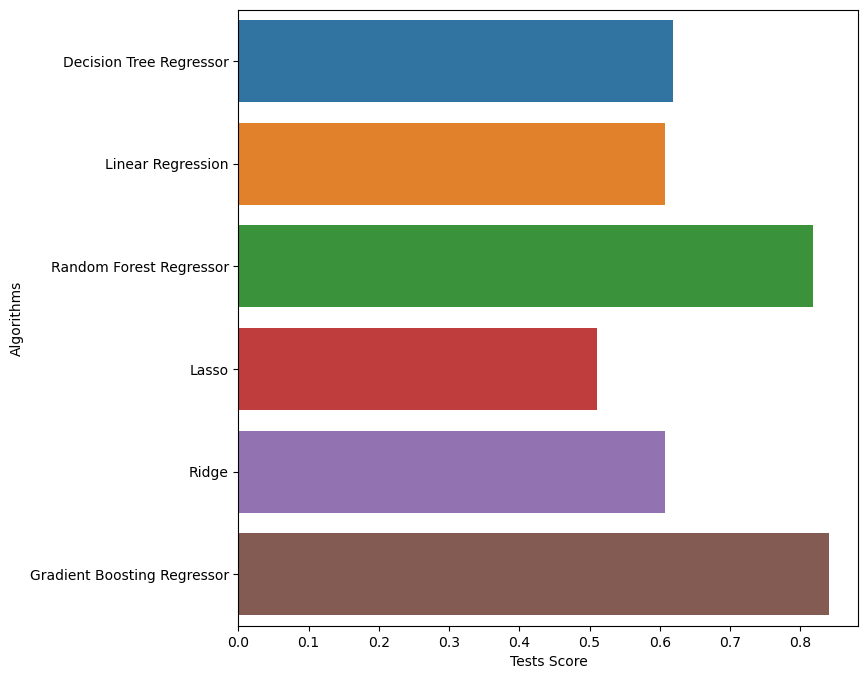

In [22]:
plt.figure(figsize=(8,8))
sns.barplot(x = "Tests Score", y = "Algorithms", data = compare_models)
plt.show()

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()
grid = dict()
grid['n_estimators'] = [10, 50, 100]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 7, 9]
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv)
# execute the grid search
grid_result = grid_search.fit(X, Y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

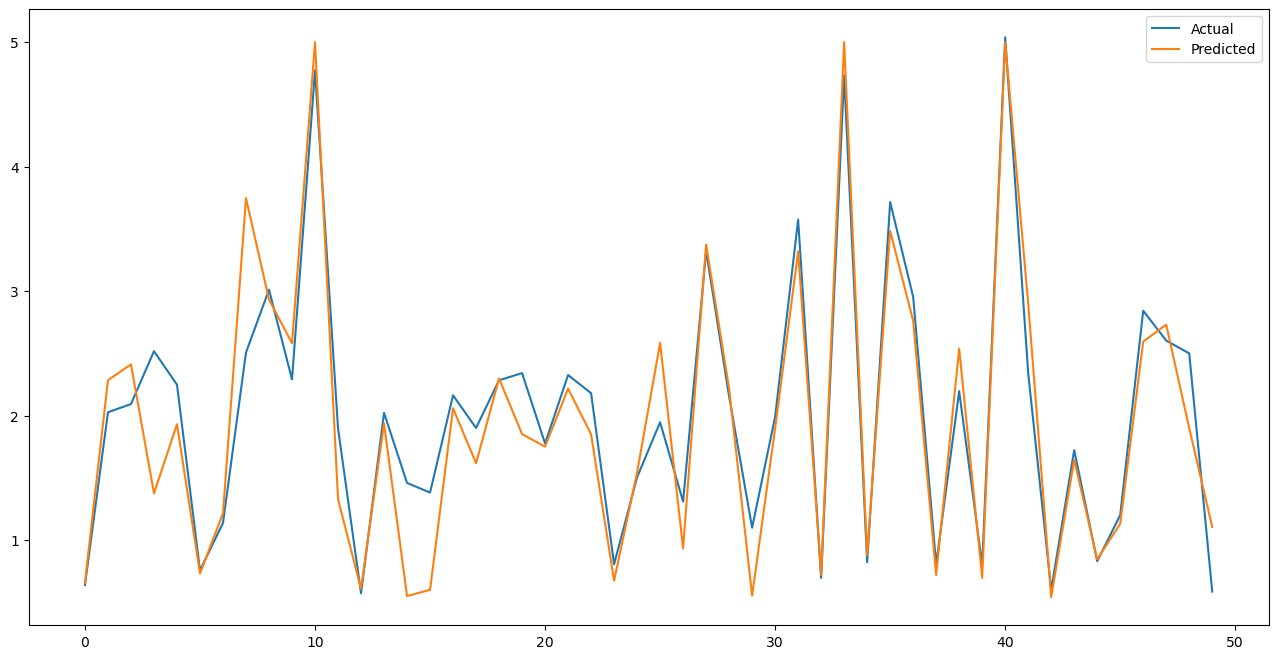

In [24]:
y_pred = gb.predict(x_test)
test = pd.DataFrame({'Predicted': y_pred, 'Actural': y_test})
fig = plt.figure(figsize = (16,8))
test = test.reset_index()
test = test.drop(['index'], axis = 1)
plt.plot(test[:50])
plt.legend(['Actual', 'Predicted'])
#sns.jointplot(x = 'Actual', y = 'Predicted', data = test, kind = 'reg')

C:\Temp\ipykernel_2348\1933840134.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(np.array(y_test[:50]),'g*', y_pred[:50], 'ro')


Text(0, 0.5, 'Median House Value')

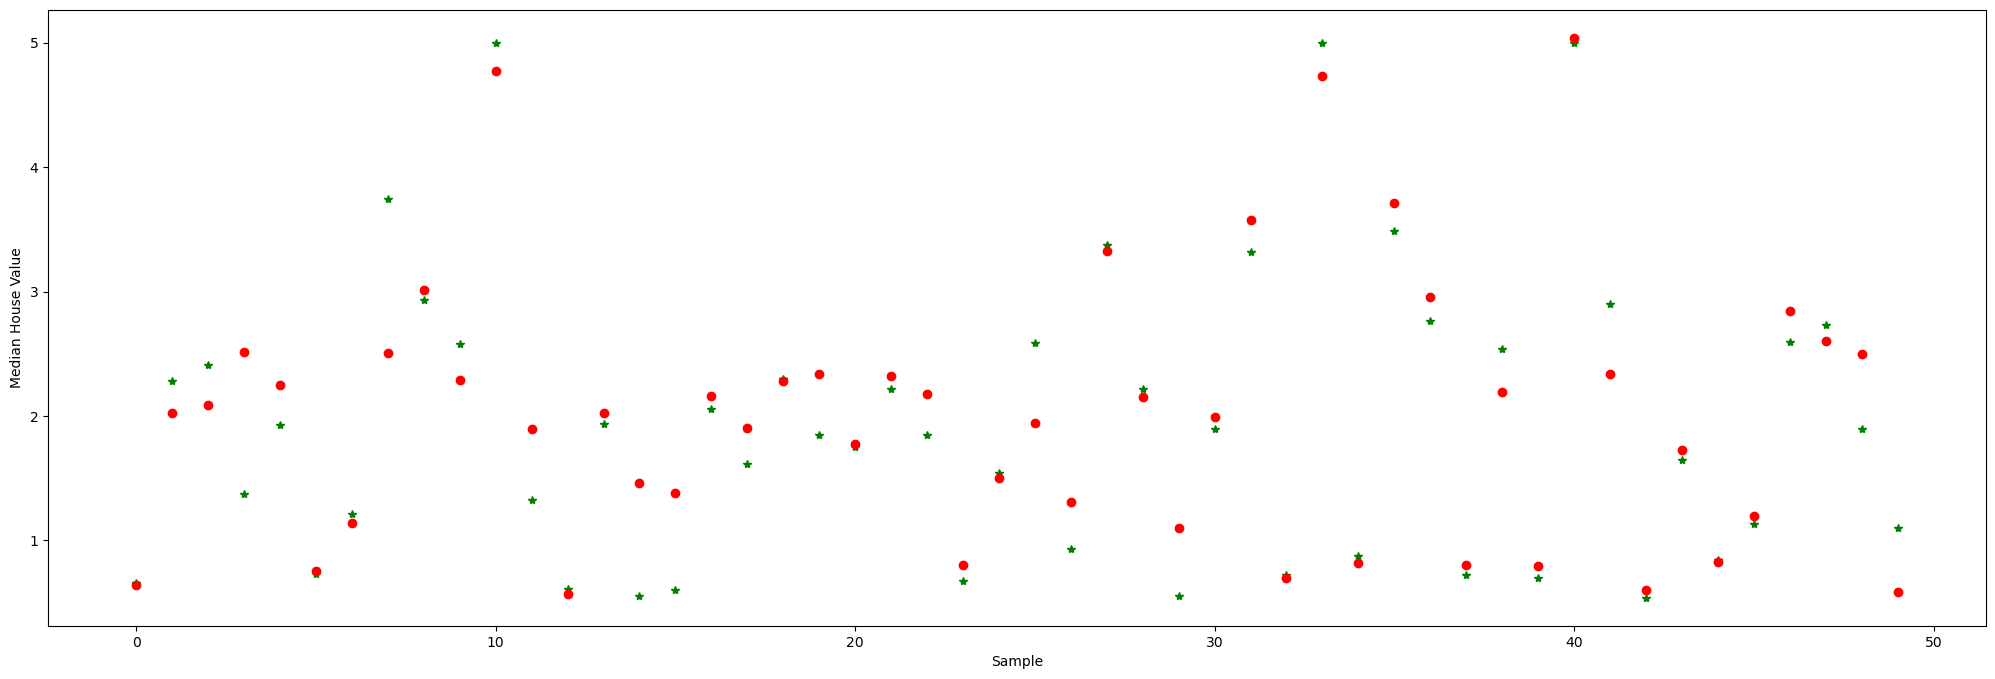

In [38]:
fig = plt.figure(figsize = (25,8))
plt.plot(np.array(y_test[:50]),'g*', y_pred[:50], 'ro')


plt.xlabel("Sample")
plt.ylabel("Median House Value")